# Everyone Can Learn Python Scholarship

## 1️⃣ Python 🐍 - CO2 Emissions

Now let's now move on to the competition and challenge.

## 📖 Background
You volunteer for a public policy advocacy organization in Canada, and your colleague asked you to help her draft recommendations for guidelines on CO2 emissions rules. 

After researching emissions data for a wide range of Canadian vehicles, she would like you to investigate which vehicles produce lower emissions.

## 💾 The data I

### You have access to seven years of CO2 emissions data for Canadian vehicles ([source](https://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64#wb-auto-6)):

- "Make" - The company that manufactures the vehicle.
- "Model" - The vehicle's model.
- "Vehicle Class" - Vehicle class by utility, capacity, and weight.
- "Engine Size(L)" - The engine's displacement in liters.
- "Cylinders" - The number of cylinders.
- "Transmission" - The transmission type: A = Automatic, AM = Automatic Manual, AS = Automatic with select shift, AV = Continuously variable, M = Manual, 3 - 10 = the number of gears.
- "Fuel Type" - The fuel type: X = Regular gasoline, Z = Premium gasoline, D = Diesel, E = Ethanol (E85), N = natural gas.
- "Fuel Consumption Comb (L/100 km)" - Combined city/highway (55%/45%) fuel consumption in liters per 100 km (L/100 km).
- "CO2 Emissions(g/km)" - The tailpipe carbon dioxide emissions in grams per kilometer for combined city and highway driving. 

The data comes from the Government of Canada's open data [website](https://open.canada.ca/en).

In [28]:
# Import the pandas and numpy packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Load the data
cars = pd.read_csv('data/co2_emissions_canada.csv')

# create numpy arrays
cars_makes = cars['Make'].to_numpy()
cars_models = cars['Model'].to_numpy()
cars_classes = cars['Vehicle Class'].to_numpy()
cars_engine_sizes = cars['Engine Size(L)'].to_numpy()
cars_cylinders = cars['Cylinders'].to_numpy()
cars_transmissions = cars['Transmission'].to_numpy()
cars_fuel_types = cars['Fuel Type'].to_numpy()
cars_fuel_consumption = cars['Fuel Consumption Comb (L/100 km)'].to_numpy()
cars_co2_emissions = cars['CO2 Emissions(g/km)'].to_numpy()

# Preview the dataframe
cars

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,8.5,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,9.6,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,5.9,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,11.1,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,10.6,244
...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,9.4,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,9.9,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,10.3,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,9.9,232


In [27]:
# Look at the first ten items in the CO2 emissions array
cars_co2_emissions[:10]

array([196, 221, 136, 255, 244, 230, 232, 255, 267, 212])

## 💪 Challenge I
Help your colleague gain insights on the type of vehicles that have lower CO2 emissions. Include:

1. What is the median engine size in liters?
2. What is the average fuel consumption for regular gasoline (Fuel Type = X), premium gasoline (Z), ethanol (E), and diesel (D)?  
3. What is the correlation between fuel consumption and CO2 emissions?
4. Which vehicle class has lower average CO2 emissions, 'SUV - SMALL' or 'MID-SIZE'? 
5. What are the average CO2 emissions for all vehicles? For vehicles with an engine size of 2.0 liters or smaller?
6. Any other insights you found during your analysis?

In [8]:
# Inspect the dataframe

cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 8   CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 519.4+ KB


In [9]:
carss = cars.drop_duplicates(keep = 'first')

carss

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,8.5,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,9.6,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,5.9,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,11.1,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,10.6,244
...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,9.4,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,9.9,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,10.3,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,9.9,232


In [10]:
# Summary statistics

cars.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Engine Size(L),7385.0,3.160068,1.354170,0.9,2.0,3.0,3.7,8.4
Cylinders,7385.0,5.615030,1.828307,3.0,4.0,6.0,6.0,16.0
Fuel Consumption Comb (L/100 km),7385.0,10.975071,2.892506,4.1,8.9,10.6,12.6,26.1
CO2 Emissions(g/km),7385.0,250.584699,58.512679,96.0,208.0,246.0,288.0,522.0


<AxesSubplot: >

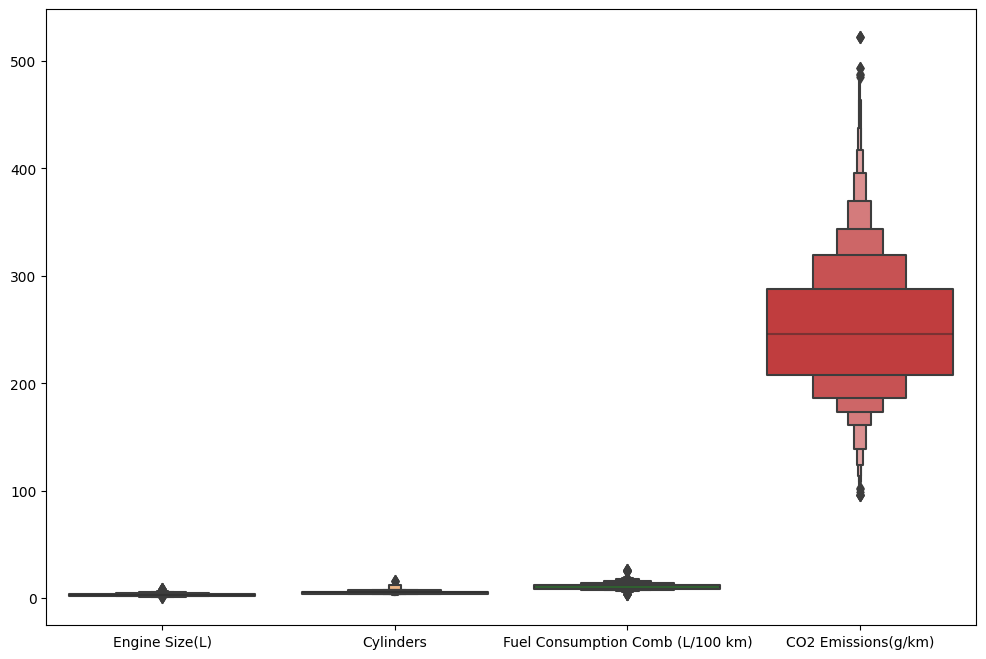

In [11]:
# Visualizing the summary statistics for further insight
plt.figure(figsize=(12,8))

sns.boxenplot(data=cars)

## REPORT

### - Using .info() method to inspect the dataset, everything looks fine.

### -  There are 9 columns and 7385 observations.

### -  There are no missing values and also, all columns are of the correct data types.

### - Looking at the boxplot, There are some outliers in the dataset but we cant be sure if they are truly extream values or not. Further analysis has to be performed on the variables to know exactly what is going on.




In [12]:
# What is the median engine size in liters?

median_engine_size_l = cars['Engine Size(L)'].median()

median_engine_size_l

3.0

## REPORT

### The median Engine Size in liters is 3.0

In [29]:
# 2. What is the average fuel consumption for regular gasoline (Fuel Type = X), premium gasoline (Z),ethanol (E), and diesel (D)?

avg_cpt = cars['Fuel Type'] == 'N'

cars_df1 = cars.loc[~avg_cpt]

avg_fuel_consumption = cars_df1.pivot_table(index='Fuel Type', values='Fuel Consumption Comb (L/100 km)', aggfunc='mean').sort_values(by='Fuel Consumption Comb (L/100 km)', ascending=True).reset_index()

avg_fuel_consumption


,Fuel Type,Fuel Consumption Comb (L/100 km)
0,D,8.835429
1,X,10.084575
2,Z,11.422767
3,E,16.861351


## REPORT

### From the computation above, Diesel which stood at almost 9 liters has the least average fuel cosumption per 100 km, follow by regular gasoline at 10 liters per 100 km. Ethanol(85) has the highest which is about 17 liters per 100 km.

In [14]:
# What is the correlation between fuel consumption and CO2 emissions?

fc_c02_corr = cars['Fuel Consumption Comb (L/100 km)'].corr(cars['CO2 Emissions(g/km)'])
fc_c02_corr

0.9180515723870849

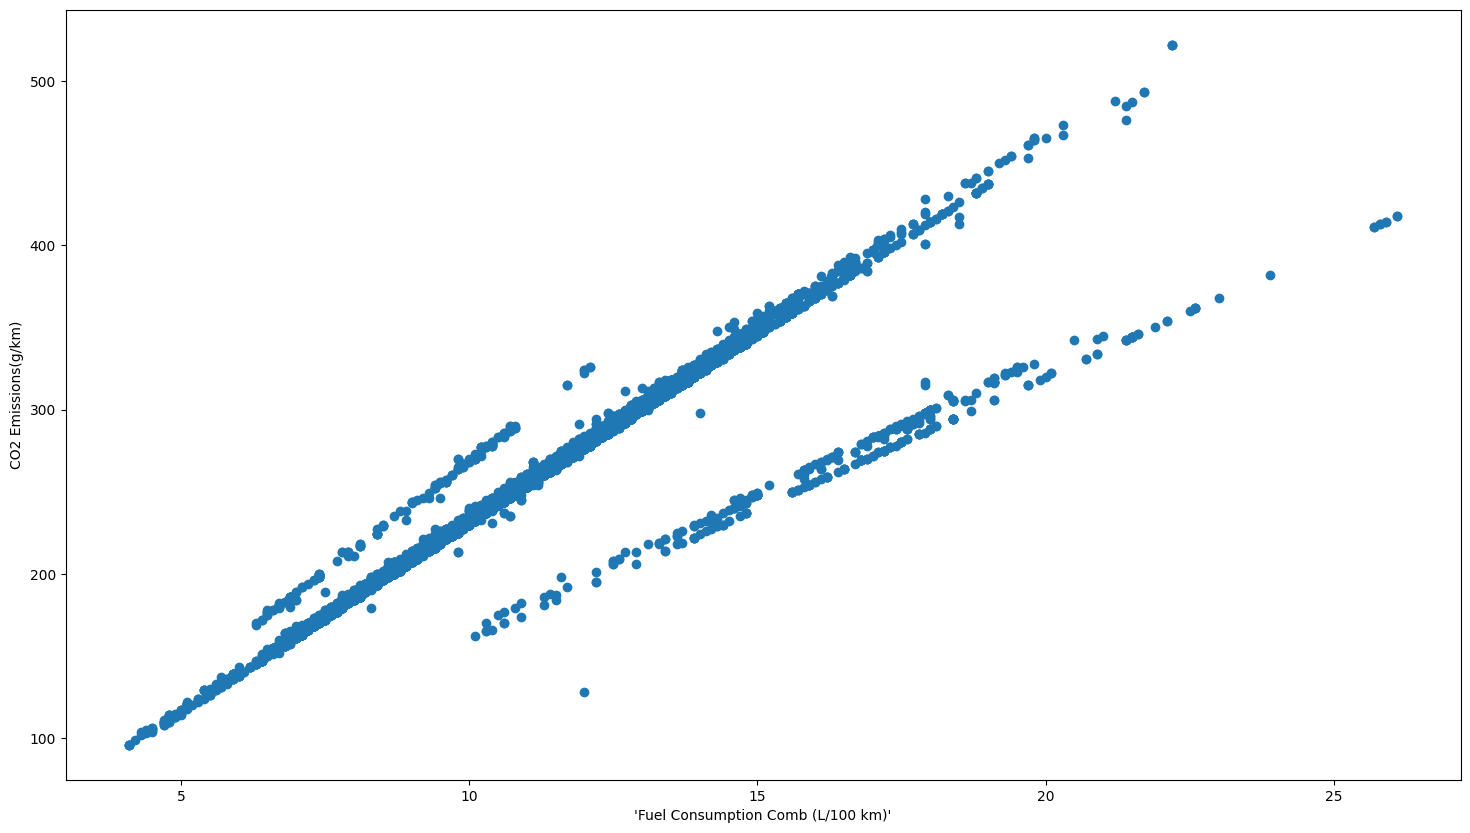

In [15]:
# Visualizing the relationship between fuel consumption and CO2 emissions?

fig, ax = plt.subplots(figsize=(18, 10))

ax.scatter(cars['Fuel Consumption Comb (L/100 km)'], cars['CO2 Emissions(g/km)'])

ax.set_xlabel("'Fuel Consumption Comb (L/100 km)'")

ax.set_ylabel("CO2 Emissions(g/km)")
plt.show()

## REPORT

### - The correlation coeficient between fuel consumption and CO2 emissions is about 92% which makes sense. The amount of C02 emmisions a car releases is positively correlated to the amount of fuel a car consumes.
### - Looking at the scatterplot above, as the value of C02 emmissions increases, the value of Fuel Consumption also increases.

In [16]:
# Which vehicle class has lower average CO2 emissions, 'SUV - SMALL' or 'MID-SIZE'?

vehicle_class = (cars['Vehicle Class'] == 'SUV - SMALL') | (cars['Vehicle Class'] == 'MID-SIZE')

cars_df2 = cars.loc[vehicle_class]

vehicle_class_avg = cars_df2.pivot_table(index='Vehicle Class', values='CO2 Emissions(g/km)', aggfunc='mean').reset_index()

vehicle_class_avg

,Vehicle Class,CO2 Emissions(g/km)
0,MID-SIZE,222.455428
1,SUV - SMALL,236.292523


## Report

### - Between SUV - SMALL and MID-SIZE On average, MID-SIZE vehicle class has the lower C02 emmision. 

In [17]:
# What are the average CO2 emissions for all vehicles?

avg_c02_all_vehicle = cars.pivot_table(index='Vehicle Class', values='CO2 Emissions(g/km)', aggfunc='mean').sort_values('CO2 Emissions(g/km)', ascending=True).reset_index()

avg_c02_all_vehicle

,Vehicle Class,CO2 Emissions(g/km)
0,STATION WAGON - SMALL,200.067460
1,COMPACT,216.679061
2,MID-SIZE,222.455428
3,SUV - SMALL,236.292523
4,MINICOMPACT,236.607362
5,SPECIAL PURPOSE VEHICLE,237.597403
6,STATION WAGON - MID-SIZE,238.698113
7,SUBCOMPACT,246.448845
8,MINIVAN,262.312500
9,FULL-SIZE,263.316119


In [18]:
# What are the average CO2 emissions For vehicles with an engine size of 2.0 liters or smaller?

vehicle_engine_size = cars['Engine Size(L)'] <= 2.0

cars_df3 = cars.loc[vehicle_engine_size]

avg_c02_vehicle_engine_size = cars_df3.pivot_table(index='Vehicle Class', values='CO2 Emissions(g/km)', aggfunc='mean').sort_values('CO2 Emissions(g/km)', ascending=True).reset_index()

avg_c02_vehicle_engine_size



,Vehicle Class,CO2 Emissions(g/km)
0,FULL-SIZE,186.562500
1,MID-SIZE,188.815126
2,COMPACT,190.464567
3,STATION WAGON - SMALL,193.031111
4,MINICOMPACT,193.912281
5,TWO-SEATER,195.342105
6,SUBCOMPACT,199.631579
7,STATION WAGON - MID-SIZE,199.666667
8,SUV - SMALL,220.736052
9,SPECIAL PURPOSE VEHICLE,226.743590


## REPORT

### - Of all vehicle class, STATION WAGON - SMALL has the lowest C02 Emission on average while VAN - PASSENGER has the highest.
### - Of all the vehicle class with engine size of 2.0 or smaller, FULL SIZE has the lowest C02 Emission on avegerage while SUV - STANDARD has the highest C02 emission on average.

## Any other insights you found during your analysis?

In [19]:
cars.corr()




,Engine Size(L),Cylinders,Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km)
Engine Size(L),1.000000,0.927653,0.817060,0.851145
Cylinders,0.927653,1.000000,0.780534,0.832644
Fuel Consumption Comb (L/100 km),0.817060,0.780534,1.000000,0.918052
CO2 Emissions(g/km),0.851145,0.832644,0.918052,1.000000


### REPORT

### - Engine size in liters and Cylinders are positively correlated with coeficient of almost 93% which means, the bigger the engine size is the higher the cylinders it uses. 
### - This also means, the more cylinder a vehicle operate with, the more it consumes fuel and also, the more it consumes fuel the more emission it produces. 
### - Also, Vehicles with higher engine size and cylinders tend to emits more C02 emmisions which explains higher C02 emmissions in some vehicle class.

## 2️⃣ SQL - Understanding the bicycle market 

## 📖 Background
You work for a chain of bicycle stores. Your new team leader comes from a different industry and wants your help learning about the bicycle market. Specifically, they need to understand better the brands and categories for sale at your stores.

## 💾 The data II

### You have access to the following tables:

#### products
- "product_id" - Product identifier.
- "product_name" - The name of the bicycle.
- "brand_id" - You can look up the brand's name in the "brands" table.
- "category_id" - You can look up the category's name in the "categories" table.
- "model_year" - The model year of the bicycle.
- "list_price" - The price of the bicycle.

#### brands
- "brand_id" - Matches the identifier in the "products" table.
- "brand_name" - One of the nine brands the store sells.

#### categories
- "category_id" - Matches the identifier in the "products" table.
- "category_name" - One of the seven product categories in the store.

In [20]:
SELECT * 
FROM products;

,product_id,product_name,brand_id,category_id,model_year,list_price
0,1,Trek 820 - 2016,9,6,2016,379.99
1,2,Ritchey Timberwolf Frameset - 2016,5,6,2016,749.99
2,3,Surly Wednesday Frameset - 2016,8,6,2016,999.99
3,4,Trek Fuel EX 8 29 - 2016,9,6,2016,2899.99
4,5,Heller Shagamaw Frame - 2016,3,6,2016,1320.99
...,...,...,...,...,...,...
316,317,Trek Checkpoint ALR 5 - 2019,9,7,2019,1999.99
317,318,Trek Checkpoint ALR 5 Women's - 2019,9,7,2019,1999.99
318,319,Trek Checkpoint SL 5 Women's - 2019,9,7,2019,2799.99
319,320,Trek Checkpoint SL 6 - 2019,9,7,2019,3799.99


In [21]:
SELECT * FROM brands;

,brand_id,brand_name
0,1,Electra
1,2,Haro
2,3,Heller
3,4,Pure Cycles
4,5,Ritchey
5,6,Strider
6,7,Sun Bicycles
7,8,Surly
8,9,Trek


In [22]:
SELECT * FROM categories

,category_id,category_name
0,1,Children Bicycles
1,2,Comfort Bicycles
2,3,Cruisers Bicycles
3,4,Cyclocross Bicycles
4,5,Electric Bikes
5,6,Mountain Bikes
6,7,Road Bikes


## 💪 Challenge II
Help your team leader understand your company's products. Include:

1. What is the most expensive item your company sells? The least expensive?
2. How many different products of each category does your company sell?
3. What are the top three brands with the highest average list price? The top three categories?
4. Any other insights you found during your analysis?

## 1. What is the most expensive item your company sells? The least expensive?

In [2]:
SELECT TOP 10 product_name, MAX(list_price) AS most_expensive
FROM products
GROUP BY product_name
ORDER BY most_expensive DESC;

,product_name,most_expensive
0,Trek Domane SLR 9 Disc - 2018,11999.99
1,Trek Domane SLR 8 Disc - 2018,7499.99
2,Trek Domane SL Frameset - 2018,6499.99
3,Trek Domane SL Frameset Women's - 2018,6499.99
4,Trek Emonda SLR 8 - 2018,6499.99
5,Trek Silque SLR 8 Women's - 2017,6499.99
6,Trek Silque SLR 7 Women's - 2017,5999.99
7,Trek Domane SL 8 Disc - 2018,5499.99
8,Trek Domane SLR 6 Disc - 2017,5499.99
9,Trek Domane SLR 6 Disc - 2018,5499.99


In [36]:
SELECT TOP 10 product_name, MIN(list_price) AS least_expensive
FROM products
GROUP BY product_name
ORDER BY least_expensive;

,product_name,least_expensive
0,Strider Classic 12 Balance Bike - 2018,89.99
1,Sun Bicycles Lil Kitt'n - 2017,109.99
2,Trek Boy's Kickster - 2015/2017,149.99
3,Trek Girl's Kickster - 2017,149.99
4,Trek Kickster - 2018,159.99
5,Trek Precaliber 12 Boys - 2017,189.99
6,Trek Precaliber 12 Girls - 2017,189.99
7,Trek Precaliber 12 Boy's - 2018,199.99
8,Trek Precaliber 12 Girl's - 2018,199.99
9,Haro Shredder 20 - 2017,209.99


## REPORT

### Selling at almost 11,999.99, Trek Domane SLR 9 Disc - 2018 is the most expensive item the company sells while the least expensive is Strider Classic 12 Balance Bike - 2018 which is sells at $89.99

## 2. How many different products of each category does your company sell?

In [26]:
SELECT category_name, COUNT(DISTINCT(product_name)) AS product_count
FROM categories
INNER JOIN products
ON categories.category_id = products.category_id
GROUP BY category_name
ORDER BY product_count DESC;

,category_name,product_count
0,Cruisers Bicycles,78
1,Mountain Bikes,60
2,Road Bikes,60
3,Children Bicycles,59
4,Comfort Bicycles,30
5,Electric Bikes,24
6,Cyclocross Bicycles,10


## REPORT

### The table above displays number of products the company sells under each category.

## 3. What are the top three brands with the highest average list price? The top three categories?

In [40]:
SELECT TOP 3 b.brand_name, ROUND(AVG(list_price), 2) AS avg_price
FROM brands AS b
INNER JOIN products AS p
ON b.brand_id = p.brand_id
GROUP BY brand_name
ORDER BY avg_price DESC;

,brand_name,avg_price
0,Trek,2500.06
1,Heller,2173.00
2,Surly,1331.75


In [39]:
SELECT TOP 3 c.category_name, ROUND(AVG(list_price), 2) AS avg_price
FROM categories AS c
INNER JOIN products AS p
ON c.category_id = p.category_id
GROUP BY category_name
ORDER BY avg_price DESC;

,category_name,avg_price
0,Electric Bikes,3281.66
1,Road Bikes,3175.36
2,Cyclocross Bicycles,2542.79


## REPORT

### The first table above shows the top 3 brands with the highest average list price. Trek as a brand name takes the number one spot with an average price of 2500.06

### While the second table shows the top 3 category with the highest average list price.

### THE END